In [1]:
# Author: Tiago Tamagusko (tamagusko@gmail.com)
# Version: 3.0 (2023-09-17)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split

%matplotlib inline

# improve quality of images
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
sns.set(rc={"figure.dpi":400, 'savefig.dpi':400})
sns.set_context('notebook')
sns.set_style("ticks")

# Regressors
DT_reg = DecisionTreeRegressor(random_state=42, max_depth=10)
RF_reg = RandomForestRegressor(random_state=42, max_depth=10)
XG_reg = xgb.XGBRegressor(random_state=42, max_depth=4)

In [3]:
# Data

# Structure
df = pd.read_csv('processed/data.csv')

In [4]:
df.head()

,YEAR,SN,IRI,STATION_ID,AGE,ACCUMULATED_AADTT,MEDIAN_PRECIPITATION,MEDIAN_TEMPERATURE
0,1989,6.1,0.8984,34_1638,4.0,1190.0,1372.800049,12.000000
1,1990,6.1,0.9420,34_1638,5.0,2440.0,1254.900024,12.900000
2,1991,6.1,0.9394,34_1638,6.0,3870.0,1189.866699,13.233333
3,1992,6.1,0.8992,34_1638,7.0,5485.0,1122.825028,12.975000
4,1993,6.1,0.9228,34_1638,8.0,6631.0,1136.980017,12.960000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  612 non-null    int64  
 1   SN                    612 non-null    float64
 2   IRI                   612 non-null    float64
 3   STATION_ID            612 non-null    object 
 4   AGE                   612 non-null    float64
 5   ACCUMULATED_AADTT     612 non-null    float64
 6   MEDIAN_PRECIPITATION  612 non-null    float64
 7   MEDIAN_TEMPERATURE    612 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 38.4+ KB


In [6]:
# Split into target and dataset
y = df['IRI']  # target
X = df.drop(['IRI', 'STATION_ID'], axis=1)

In [7]:
X.shape, y.shape

((612, 6), (612,))

In [8]:
# Split in 75/25 (train/test)
train_threshold = 0.75

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_threshold, random_state=0)

In [9]:
# Train models
DT_reg.fit(X_train, y_train)
RF_reg.fit(X_train, y_train)
XG_reg.fit(X_train, y_train)
print('Data trained! =)')

Data trained! =)


In [10]:
# Predict results
resultDT = DT_reg.predict(X_test)
resultRF = RF_reg.predict(X_test)
resultXG = XG_reg.predict(X_test)
print('Predicted! =)')

Predicted! =)


In [11]:
# def corrdot(*args, **kwargs):
#     corr_r = args[0].corr(args[1], 'pearson')
#     corr_text = f"{corr_r:2.2f}".replace("0.", ".")
#     ax = plt.gca()
#     ax.set_axis_off()
#     marker_size = abs(corr_r) * 30000
#     ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
#                vmin=-1, vmax=1, transform=ax.transAxes)
#     font_size = abs(corr_r) * 50 + 5
#     ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
#                 ha='center', va='center', fontsize=font_size)

# sns.set(style='ticks', font_scale=1.6)

# g = sns.PairGrid(DATA, aspect=1.4, diag_sharey=False)
# g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
# g.map_diag(sns.histplot, kde_kws={'color': 'black'})
# g.map_upper(corrdot)
# # g.savefig('results/scatter_matrixSNS.png')

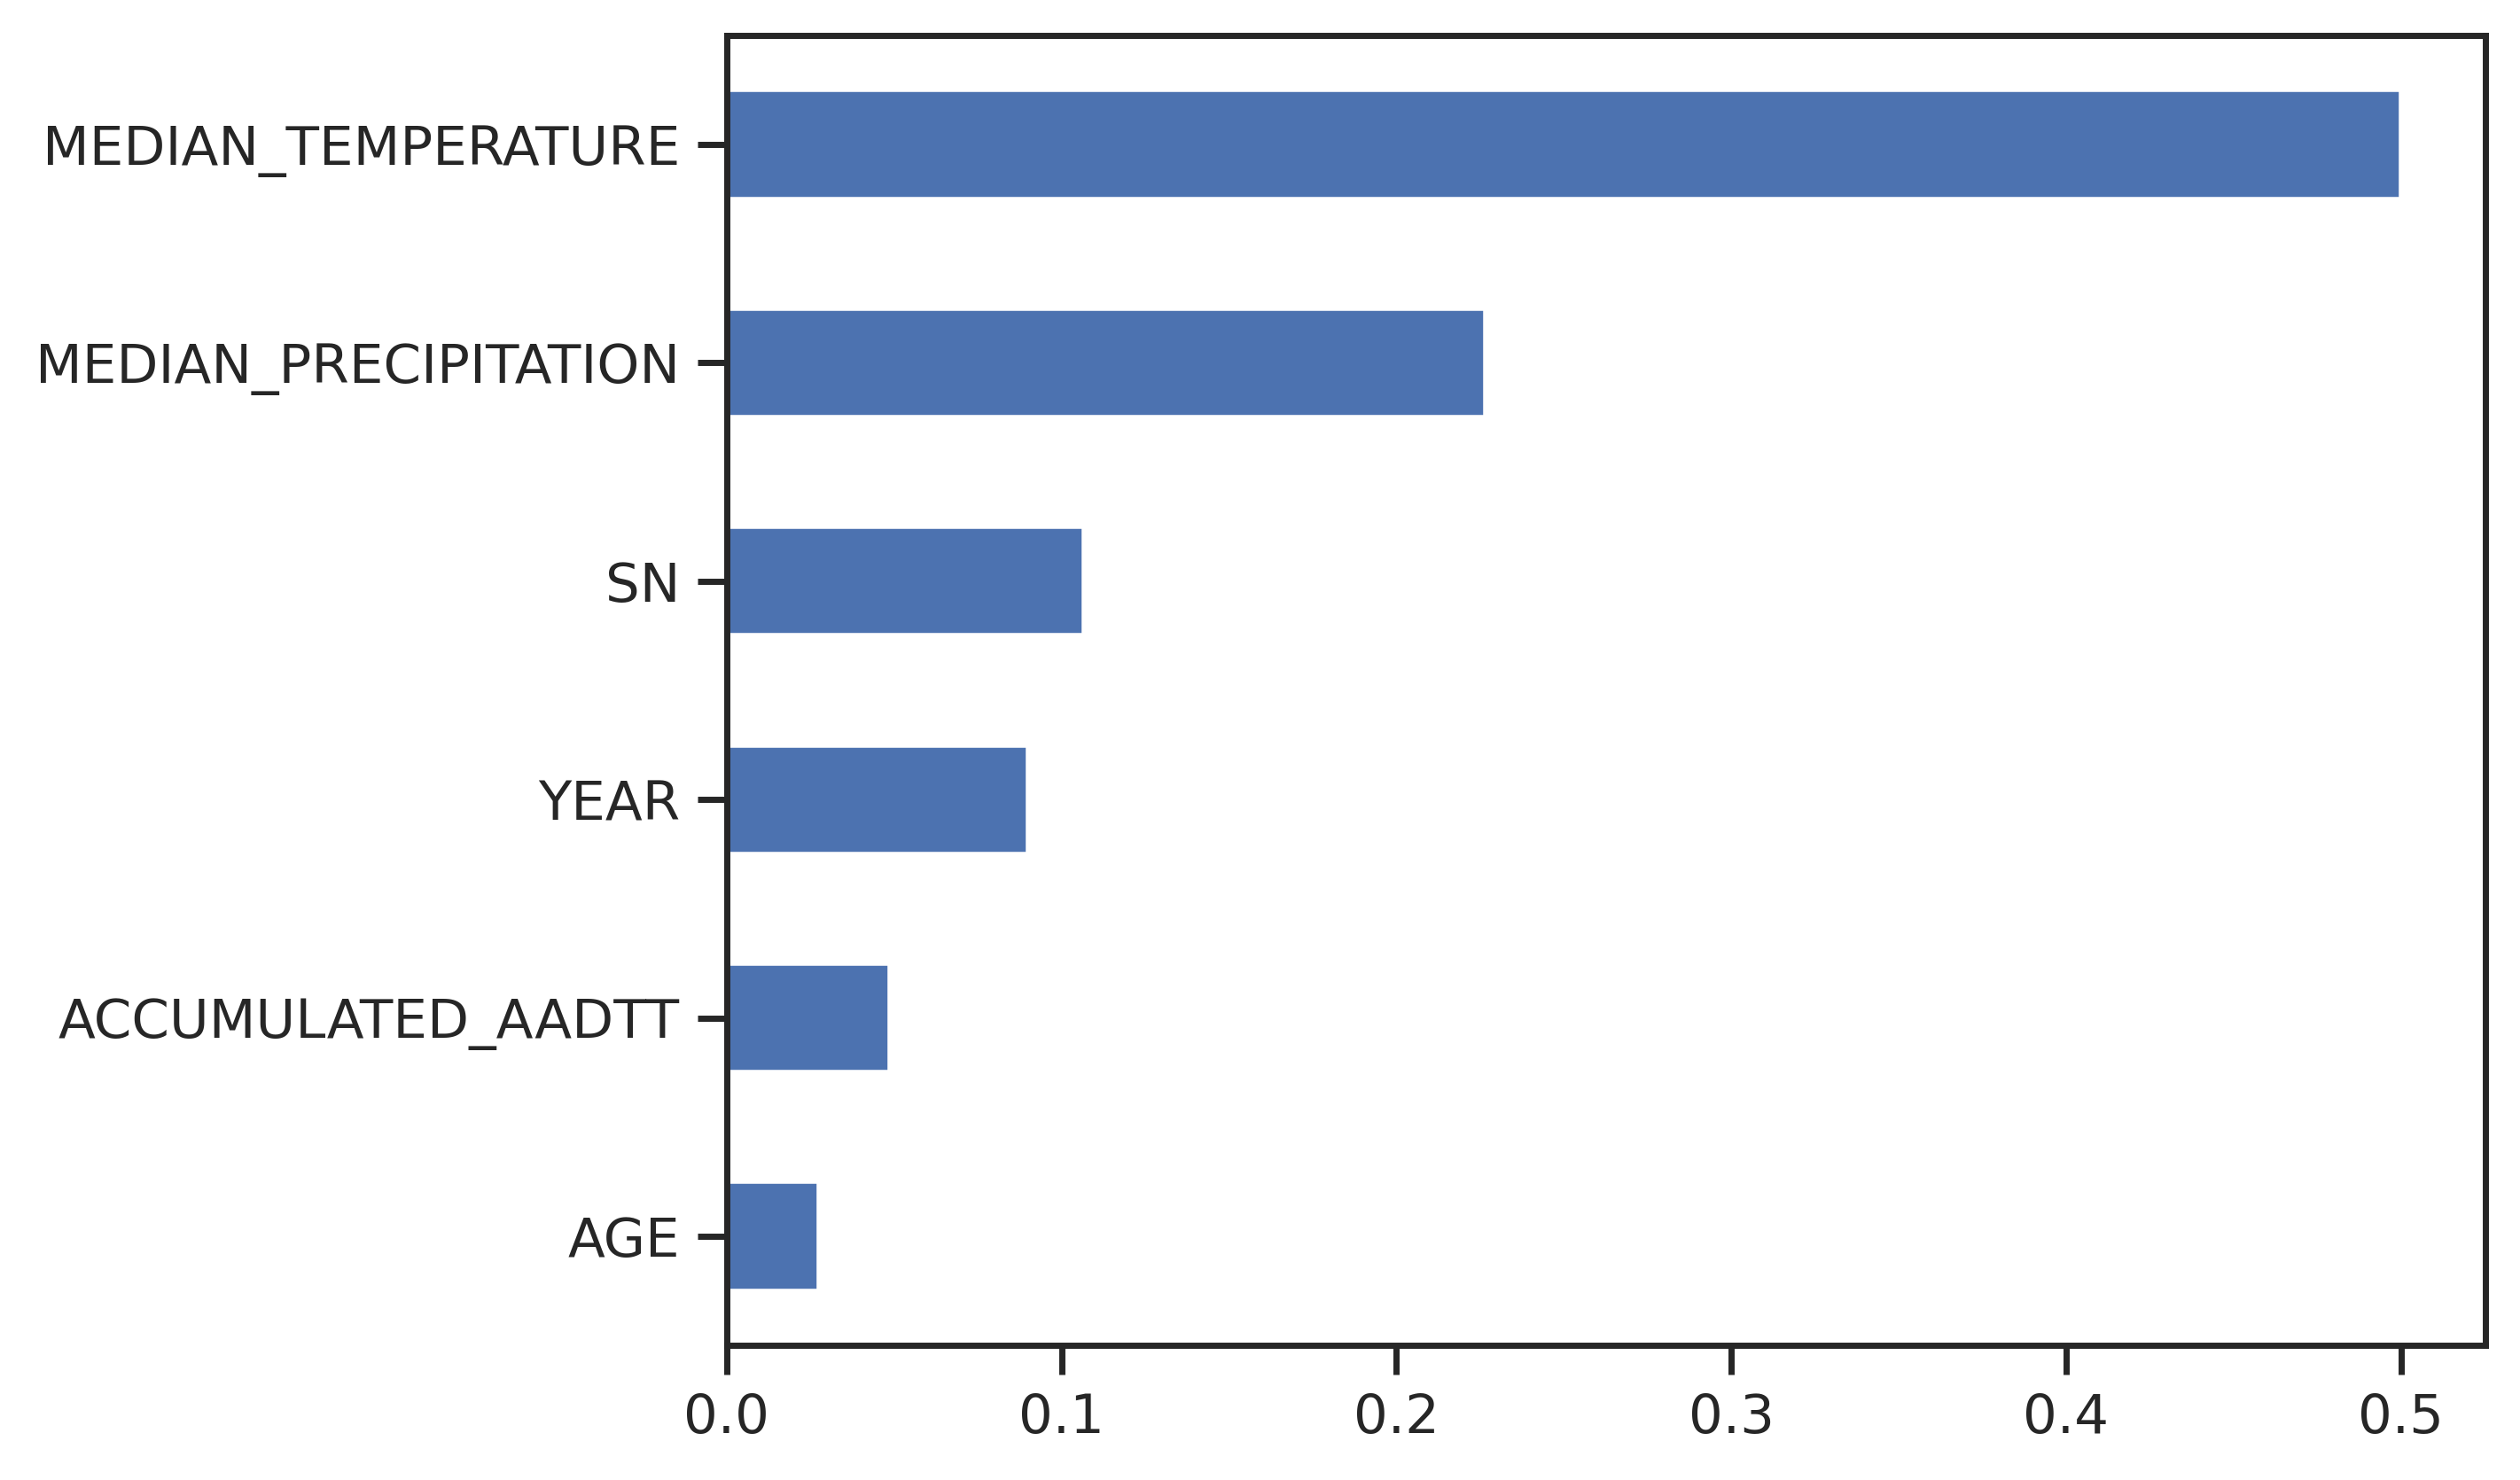

In [12]:
# feature importance for DT
importanceDT = DT_reg.feature_importances_
graphImportanceDT = pd.Series(importanceDT, index=X_train.columns).sort_values().plot.barh()
fig = graphImportanceDT.get_figure()
# fig.savefig('results/importanceDT.png')

In [13]:
# summarize feature importance for DT

for i, v in enumerate(importanceDT):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i], v))

Feature: YEAR, Score: 0.09009
Feature: SN, Score: 0.10670
Feature: AGE, Score: 0.02772
Feature: ACCUMULATED_AADTT, Score: 0.04871
Feature: MEDIAN_PRECIPITATION, Score: 0.22658
Feature: MEDIAN_TEMPERATURE, Score: 0.50021


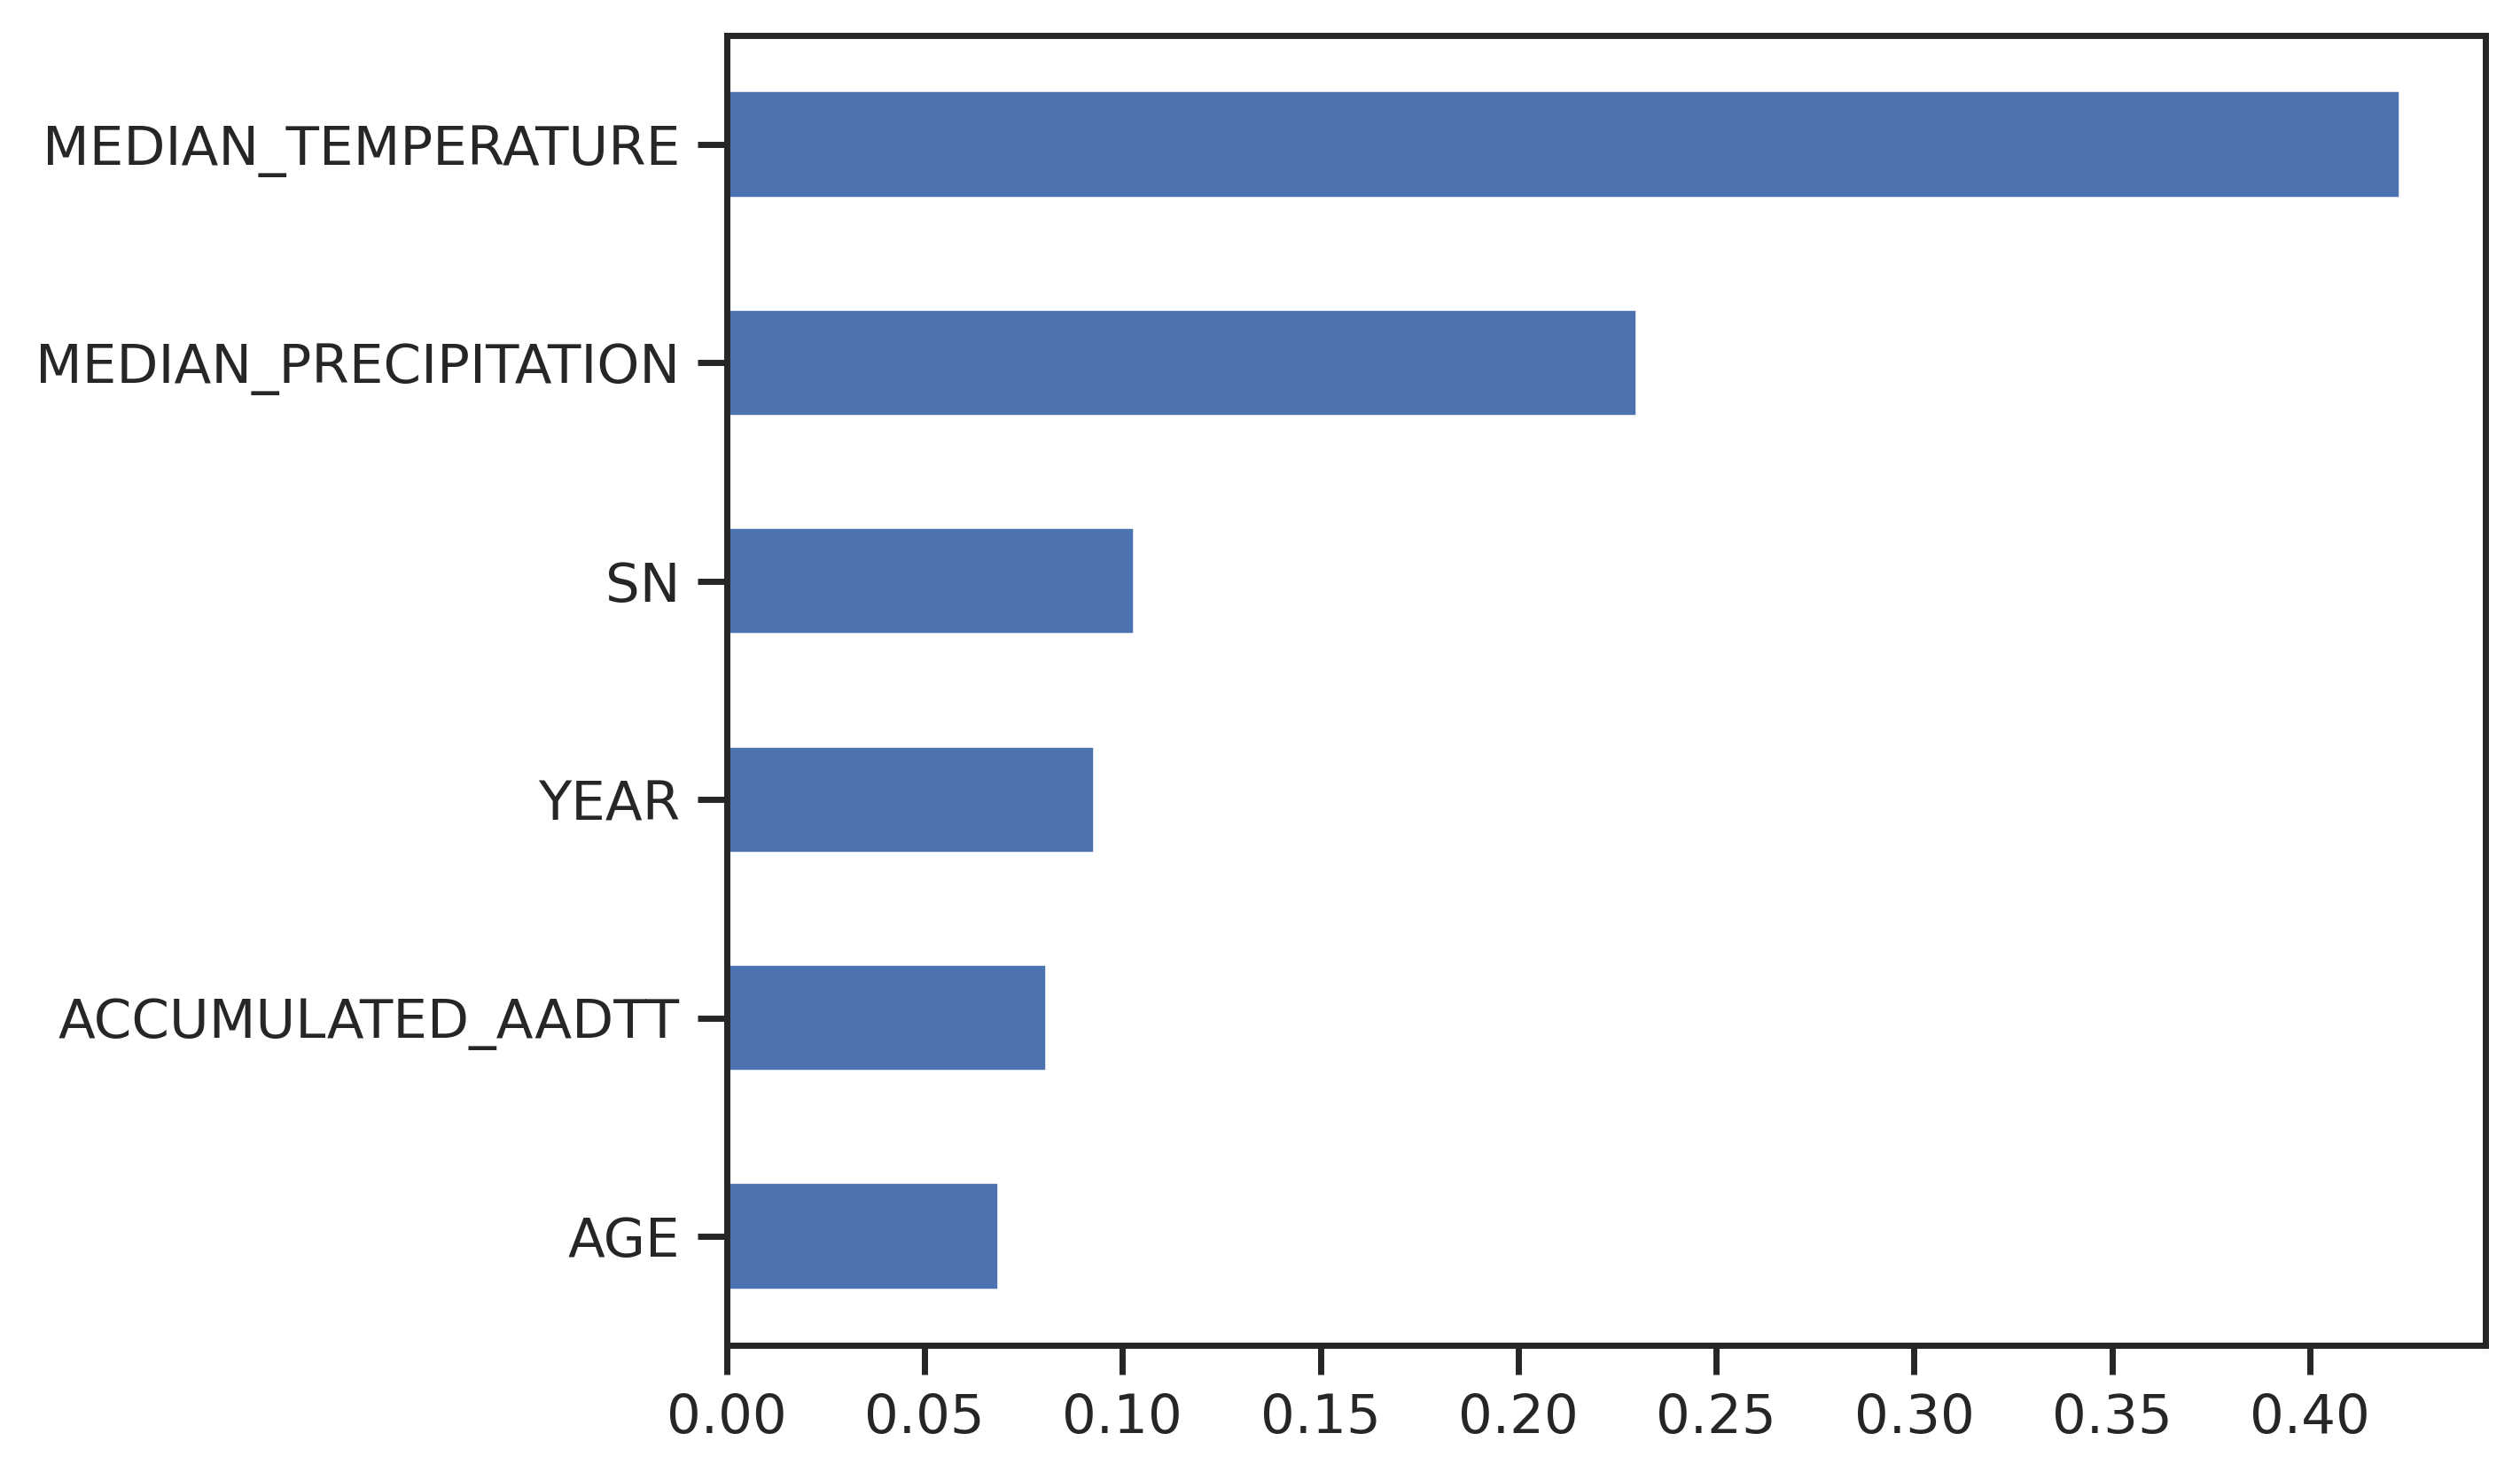

In [14]:
# feature importance for RF
importanceRF = RF_reg.feature_importances_
graphImportanceRF = pd.Series(importanceRF, index=X_train.columns).sort_values().plot.barh()

fig = graphImportanceRF.get_figure()
# fig.savefig('results/importanceRF.png')

In [15]:
# summarize feature importance for RF
for i, v in enumerate(importanceRF):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i], v))

Feature: YEAR, Score: 0.09318
Feature: SN, Score: 0.10340
Feature: AGE, Score: 0.06898
Feature: ACCUMULATED_AADTT, Score: 0.08102
Feature: MEDIAN_PRECIPITATION, Score: 0.23027
Feature: MEDIAN_TEMPERATURE, Score: 0.42315


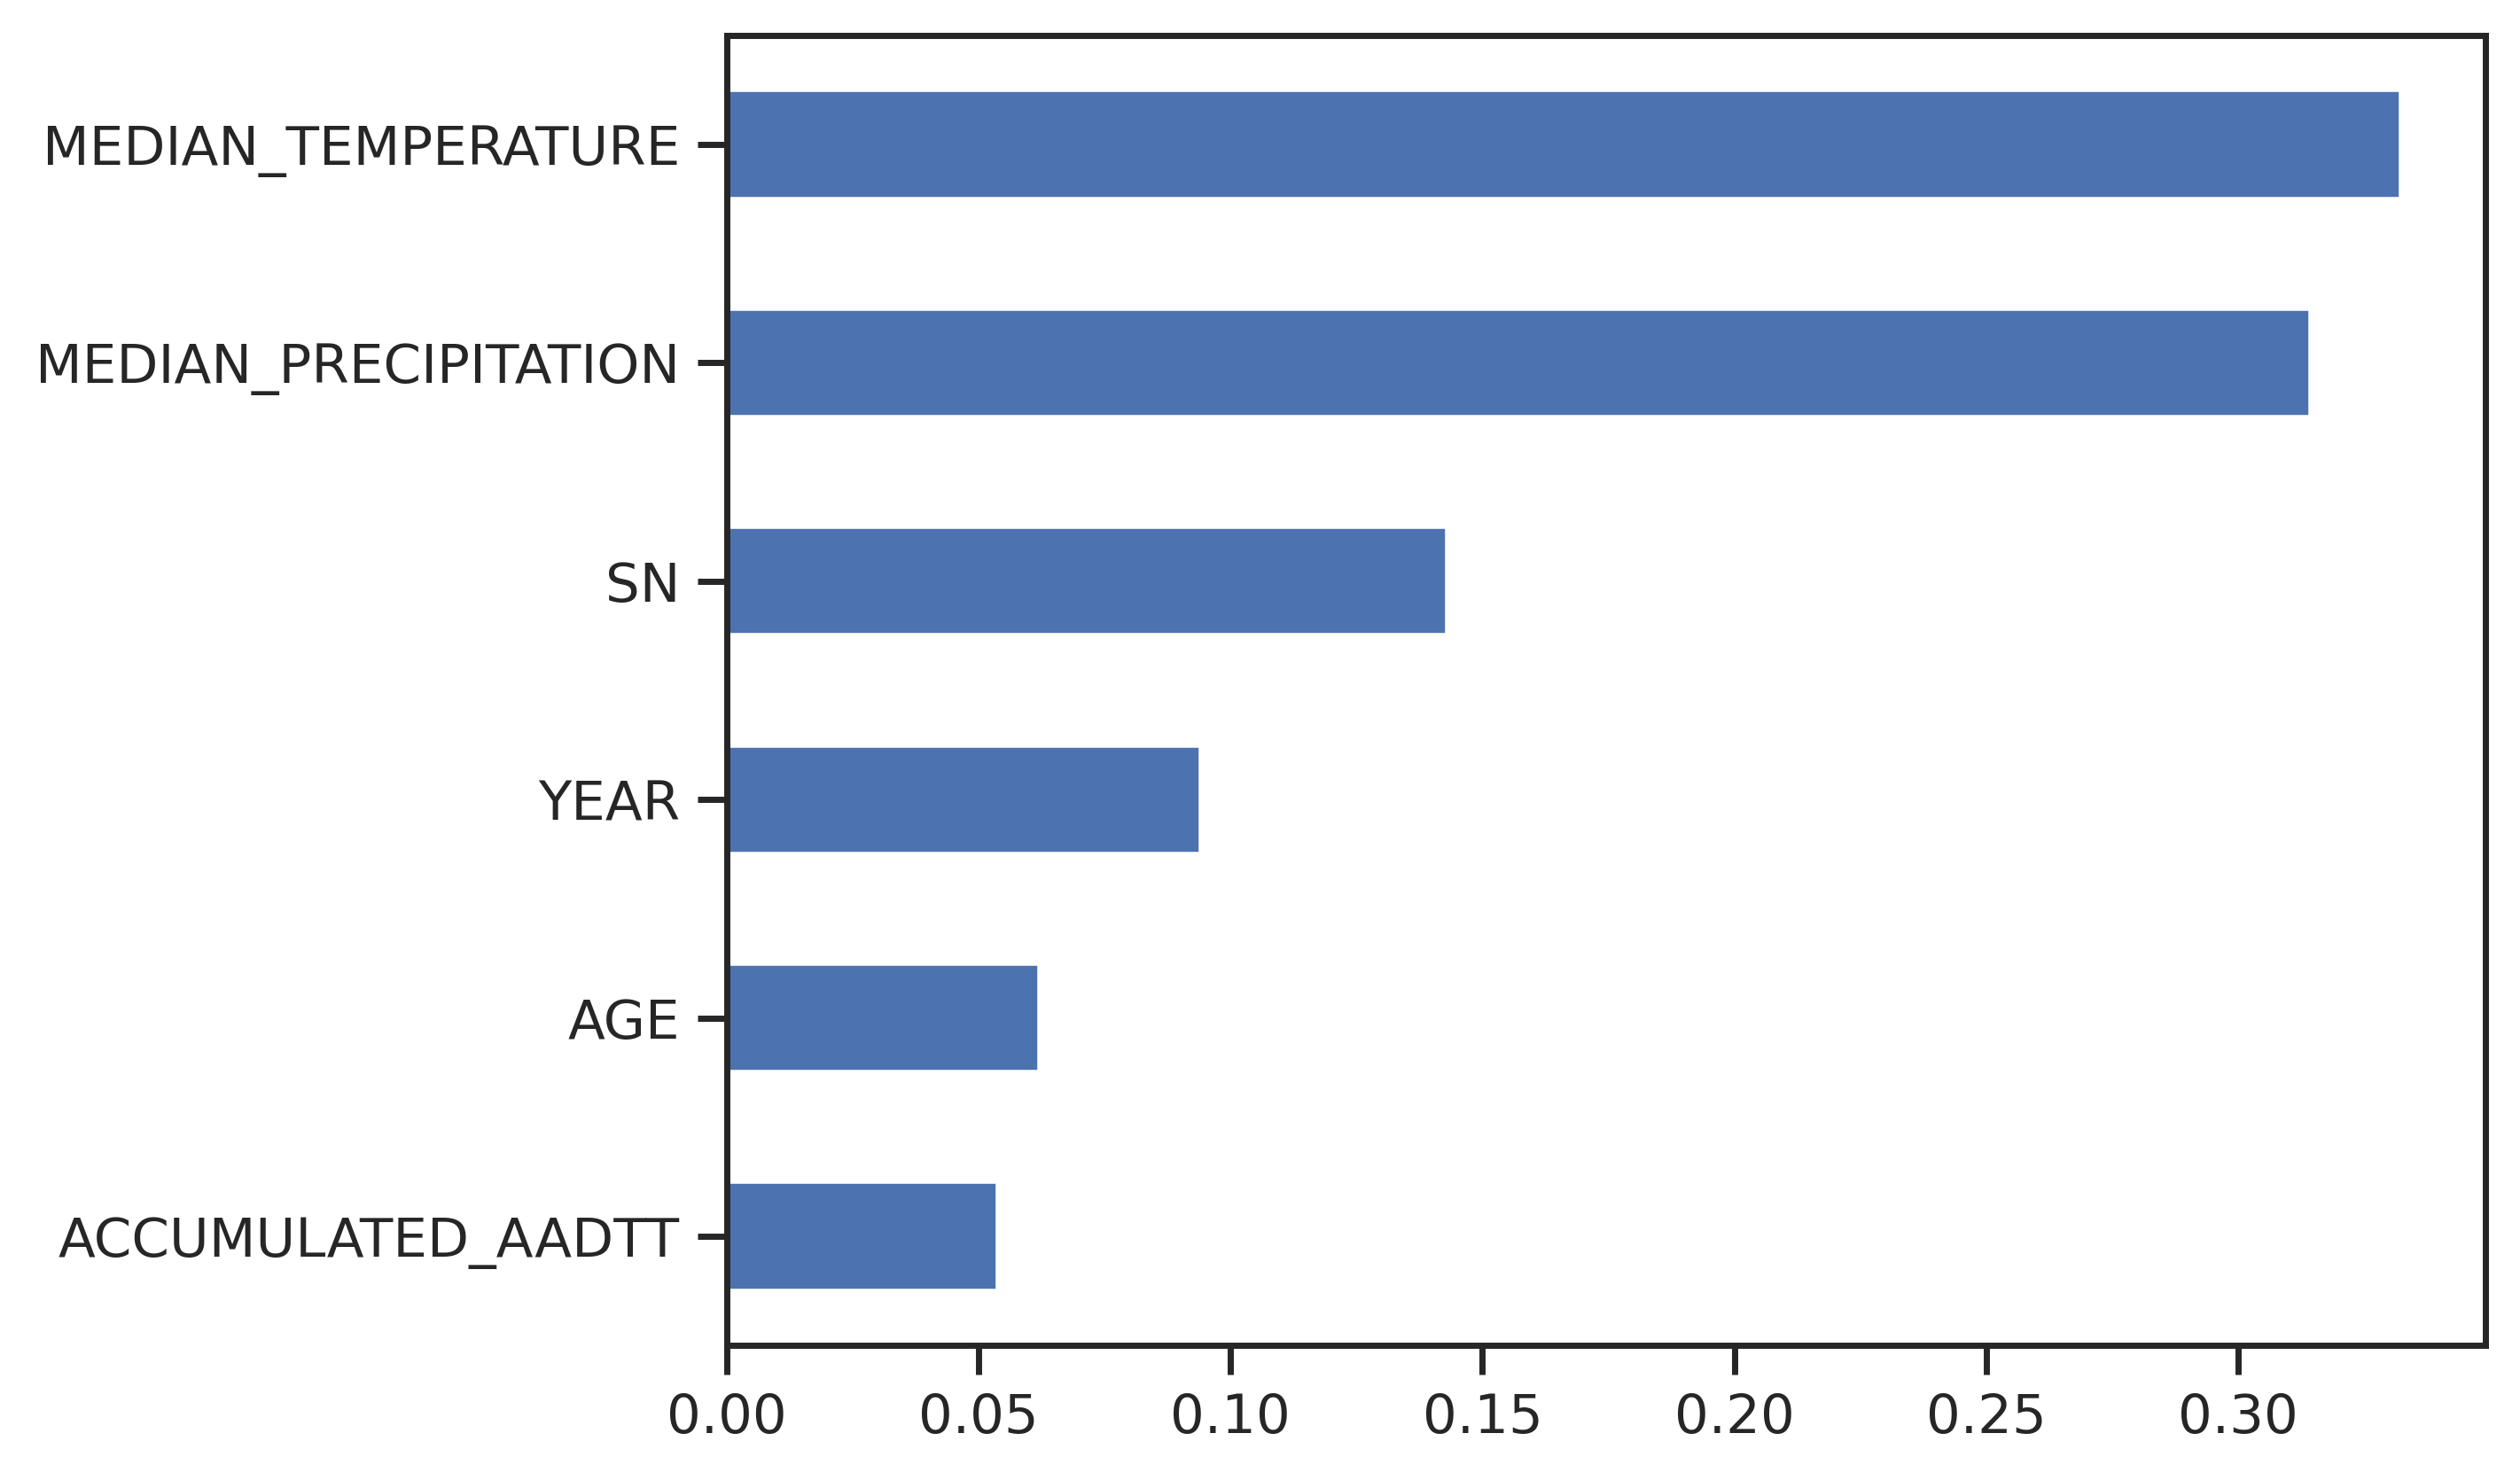

In [16]:
# feature importance for XGBoost
importanceXG = XG_reg.feature_importances_
graphImportanceXG = pd.Series(importanceXG, index=X_train.columns).sort_values().plot.barh()

fig = graphImportanceXG.get_figure()
# fig.savefig('results/importanceXG.png')

In [17]:
# summarize feature importance for XGBoost
for i, v in enumerate(importanceXG):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i], v))

Feature: YEAR, Score: 0.09412
Feature: SN, Score: 0.14298
Feature: AGE, Score: 0.06221
Feature: ACCUMULATED_AADTT, Score: 0.05392
Feature: MEDIAN_PRECIPITATION, Score: 0.31436
Feature: MEDIAN_TEMPERATURE, Score: 0.33240


In [18]:
# Metrics
def r2(y_test, y_pred):
    return round(r2_score(y_test, y_pred), 2)


def rmse(y_test, y_pred):
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)


def mae(y_test, y_pred):
    return round(mean_absolute_error(y_test, y_pred), 2)


# r2
r2DT = r2(y_test, resultDT)
r2RF = r2(y_test, resultRF)
r2XG = r2(y_test, resultXG)

# rmse
rmseDT = rmse(y_test, resultDT)
rmseRF = rmse(y_test, resultRF)
rmseXG = rmse(y_test, resultXG)

# MAE
maeDT = mae(y_test, resultDT)
maeRF = mae(y_test, resultRF)
maeXG = mae(y_test, resultXG)

In [19]:
# Display results
print("Model Performance Metrics:")
print("-" * 30)

print("\nDecision Tree (DT):")
print(f"R2   : {r2DT}")
print(f"RMSE : {rmseDT}")
print(f"MAE  : {maeDT}")

print("\nRandom Forest (RF):")
print(f"R2   : {r2RF}")
print(f"RMSE : {rmseRF}")
print(f"MAE  : {maeRF}")

print("\nXGBoost:")
print(f"R2   : {r2XG}")
print(f"RMSE : {rmseXG}")
print(f"MAE  : {maeXG}")

Model Performance Metrics:
------------------------------

Decision Tree (DT):
R2   : 0.86
RMSE : 0.22
MAE  : 0.12

Random Forest (RF):
R2   : 0.85
RMSE : 0.23
MAE  : 0.15

XGBoost:
R2   : 0.88
RMSE : 0.21
MAE  : 0.12


In [20]:
# calc. of samples
n_train = int(X.shape[0]*train_threshold)
n_test = int(X.shape[0])-n_train

In [21]:
# np.shape(TreeRegResult)[0]
x = np.arange(np.shape(y_test)[0])

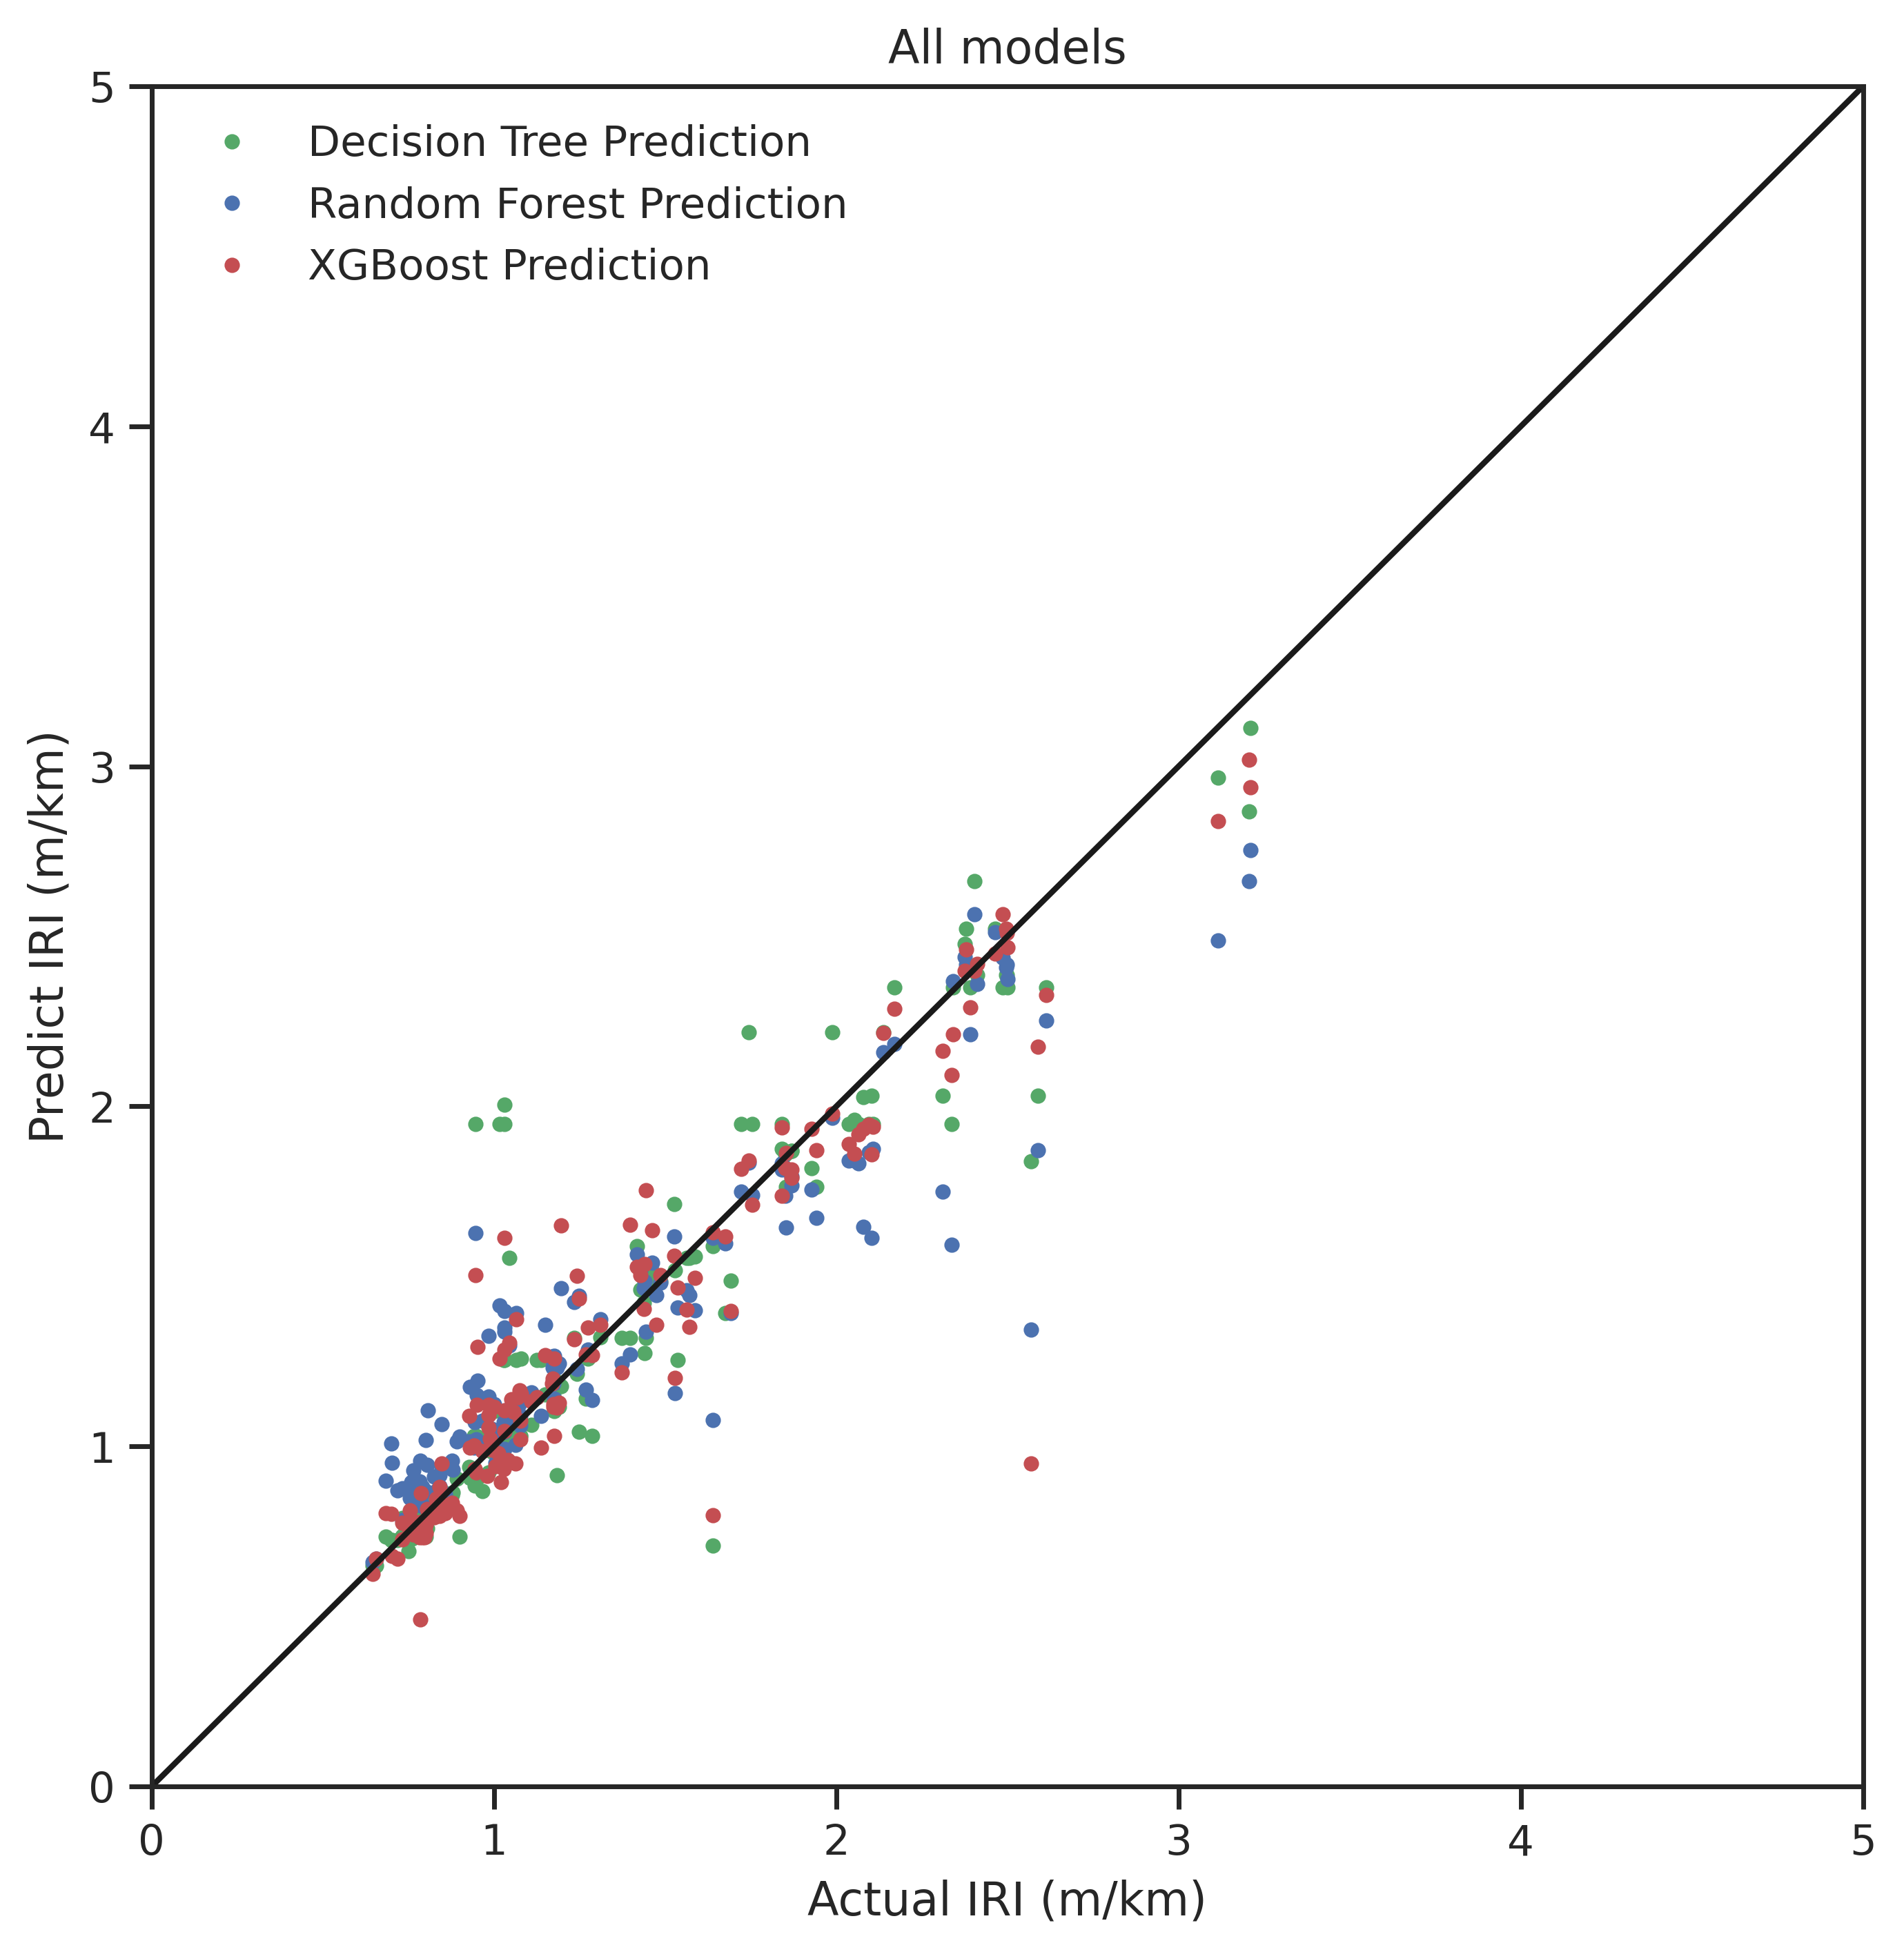

In [22]:
# plot all results
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(y_test, resultDT, 'g.', label='Decision Tree Prediction')
plt.plot(y_test, resultRF, 'b.', label='Random Forest Prediction')
plt.plot(y_test, resultXG, 'r.', label='XGBoost Prediction')
plt.xlabel('Actual IRI (m/km)')
plt.ylabel('Predict IRI (m/km)')
plt.plot(x, x, 'k-')  # identity line
# poor to fair threshold.. 2.7
# plt.hlines(2.7, 0, 2.7, colors='black', linestyles='dashed', linewidth=1.2)
# plt.vlines(2.7, 0, 2.7, colors='black', linestyles='dashed', linewidth=1.2)
plt.axis([0, 5, 0, 5])
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.title("All models")
# plt.savefig('results/treesComparison.png')
plt.show()

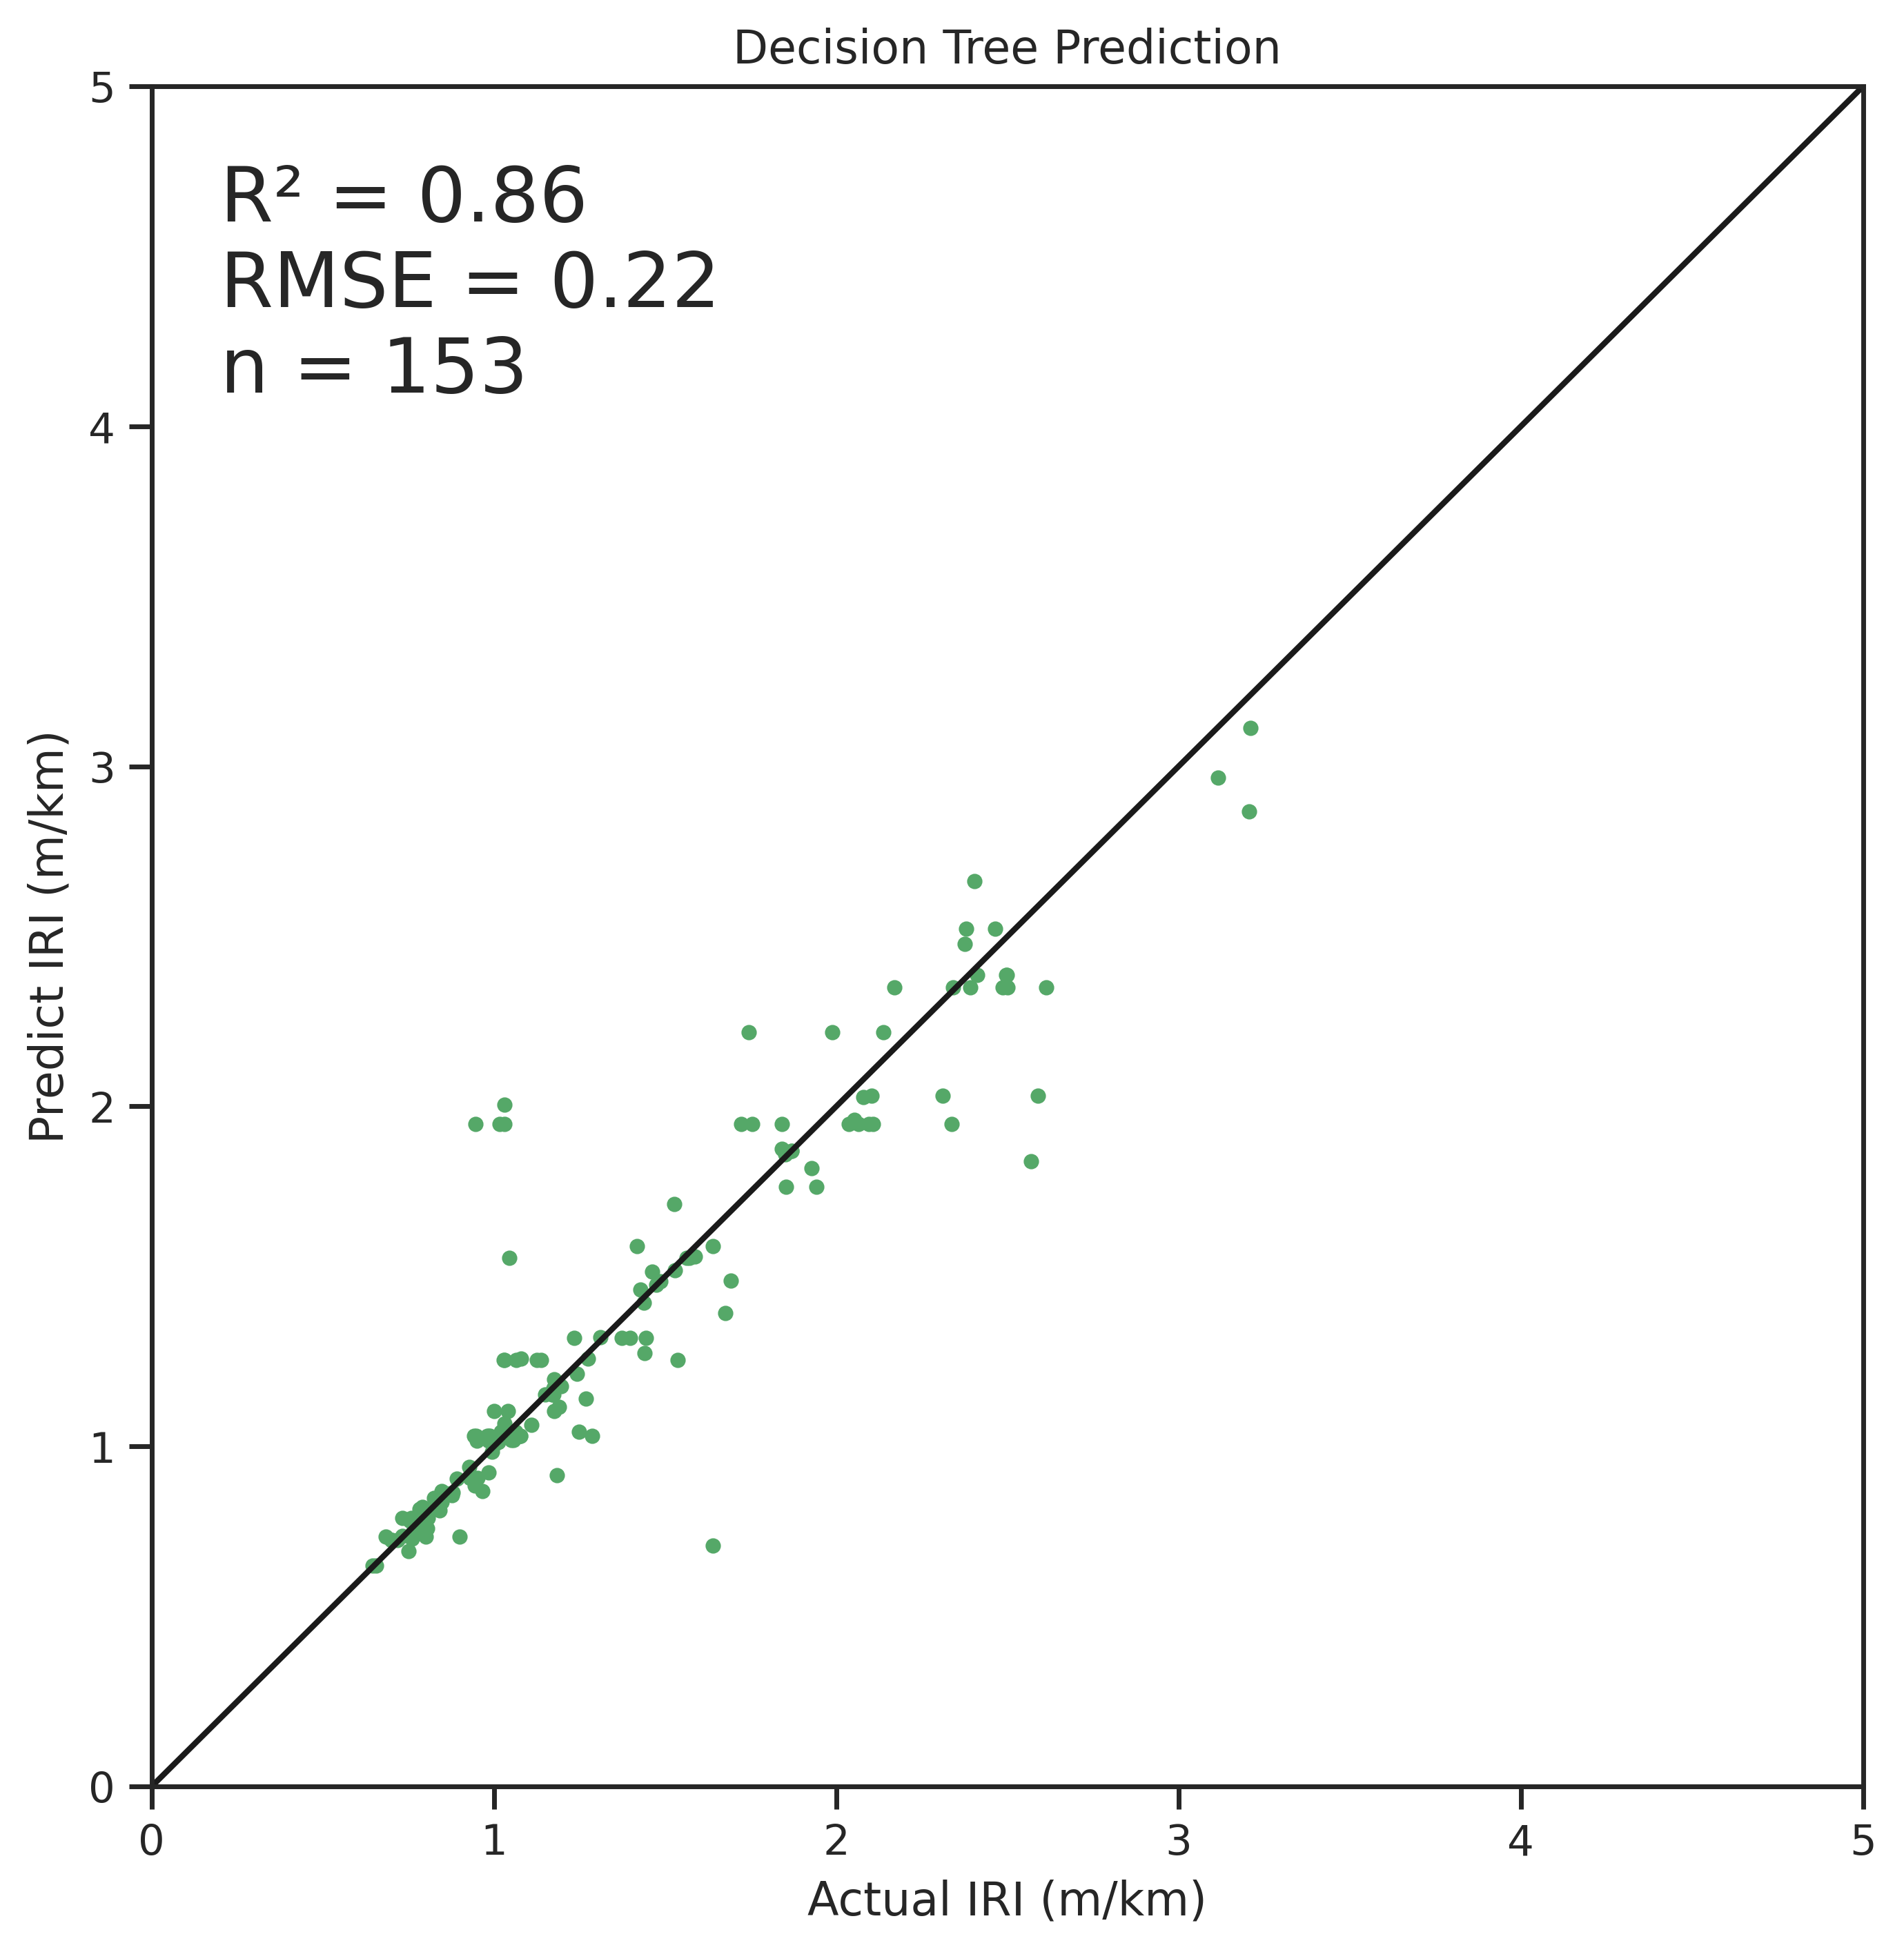

In [23]:
# plot DT results (test)
plt.rcParams['figure.figsize'] = (8,8)
plt.plot(y_test, resultDT, 'g.')
plt.xlabel('Actual IRI (m/km)')
plt.ylabel('Predict IRI (m/km)')
plt.plot(x, x, 'k-')  # identity line
plt.axis([0, 5, 0, 5])
s = "R² = %.2f \nRMSE = %.2f\nn = %i" % (r2DT, rmseDT, n_test)
plt.text(0.2, 4.1, s, fontsize=20)
plt.title("Decision Tree Prediction")
# plt.savefig('results/DT.png')
plt.show()

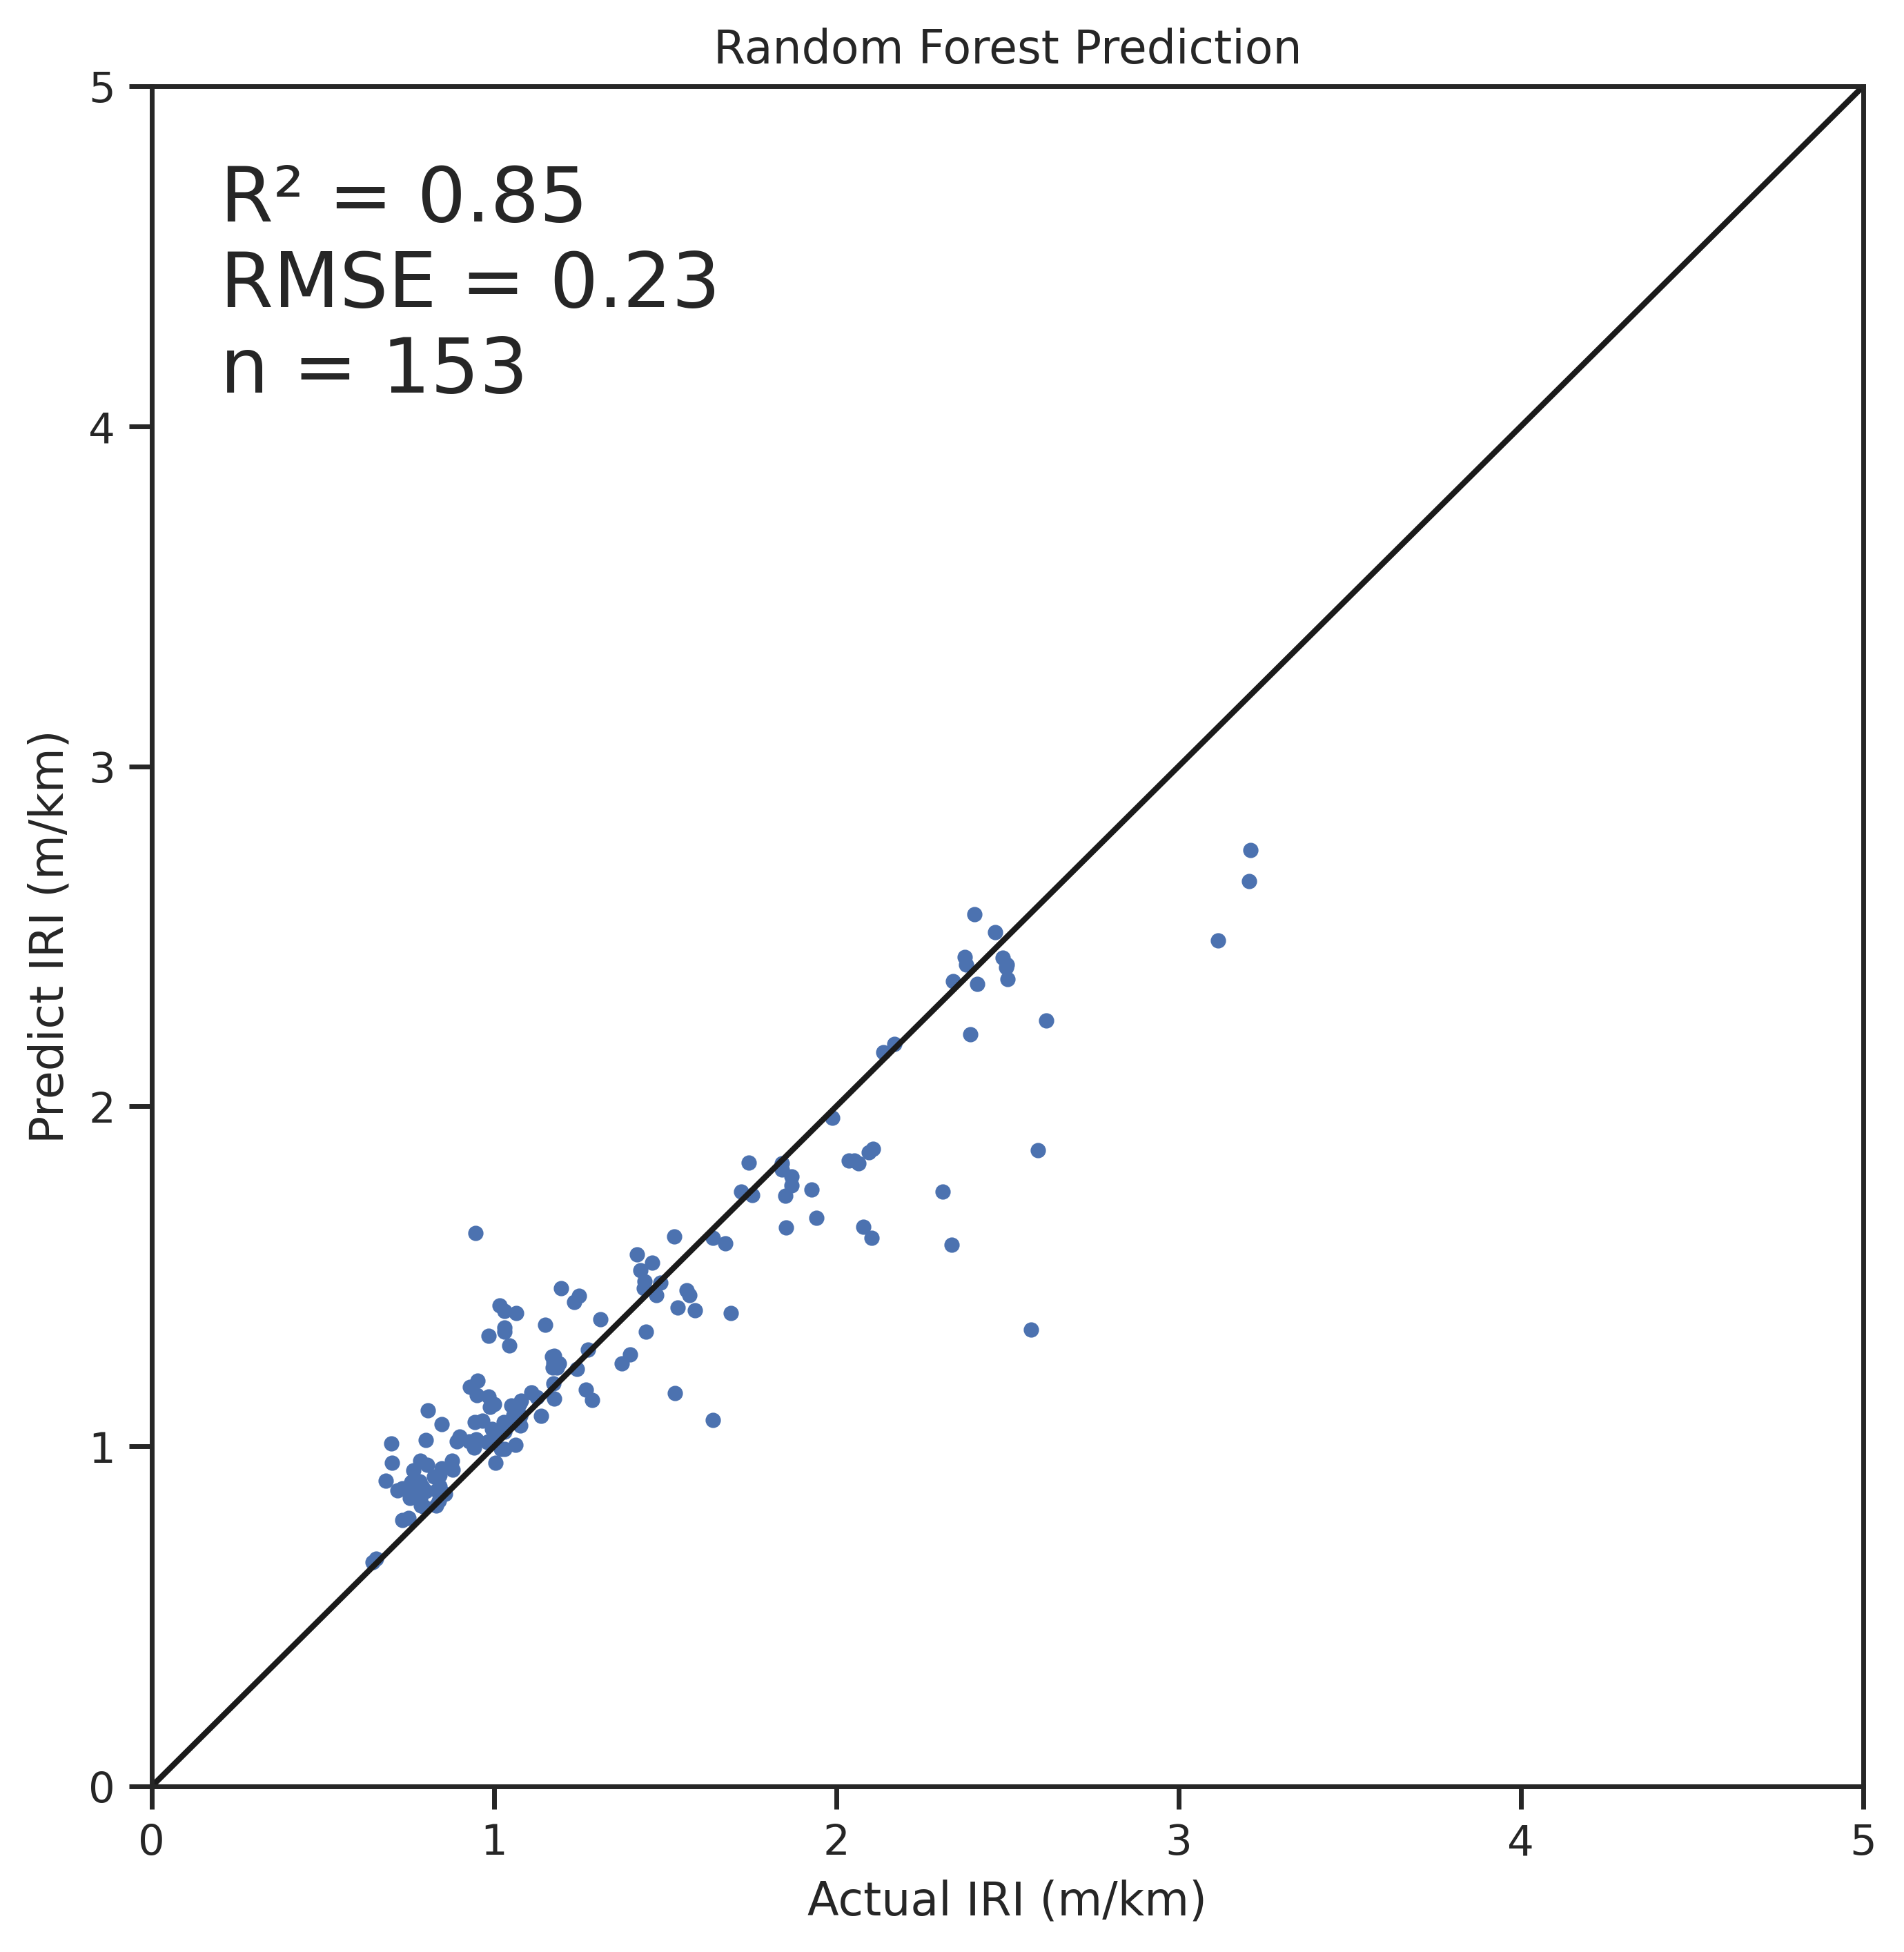

In [24]:
# plot RF results
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(y_test, resultRF, 'b.')
plt.xlabel('Actual IRI (m/km)')
plt.ylabel('Predict IRI (m/km)')
plt.plot(x, x, 'k-')  # identity line
plt.axis([0, 5, 0, 5])
s = "R² = %.2f \nRMSE = %.2f\nn = %i" % (r2RF, rmseRF, n_test)
plt.text(0.2, 4.1, s, fontsize=20)
plt.title("Random Forest Prediction")
# plt.savefig('results/RF.png')
plt.show()

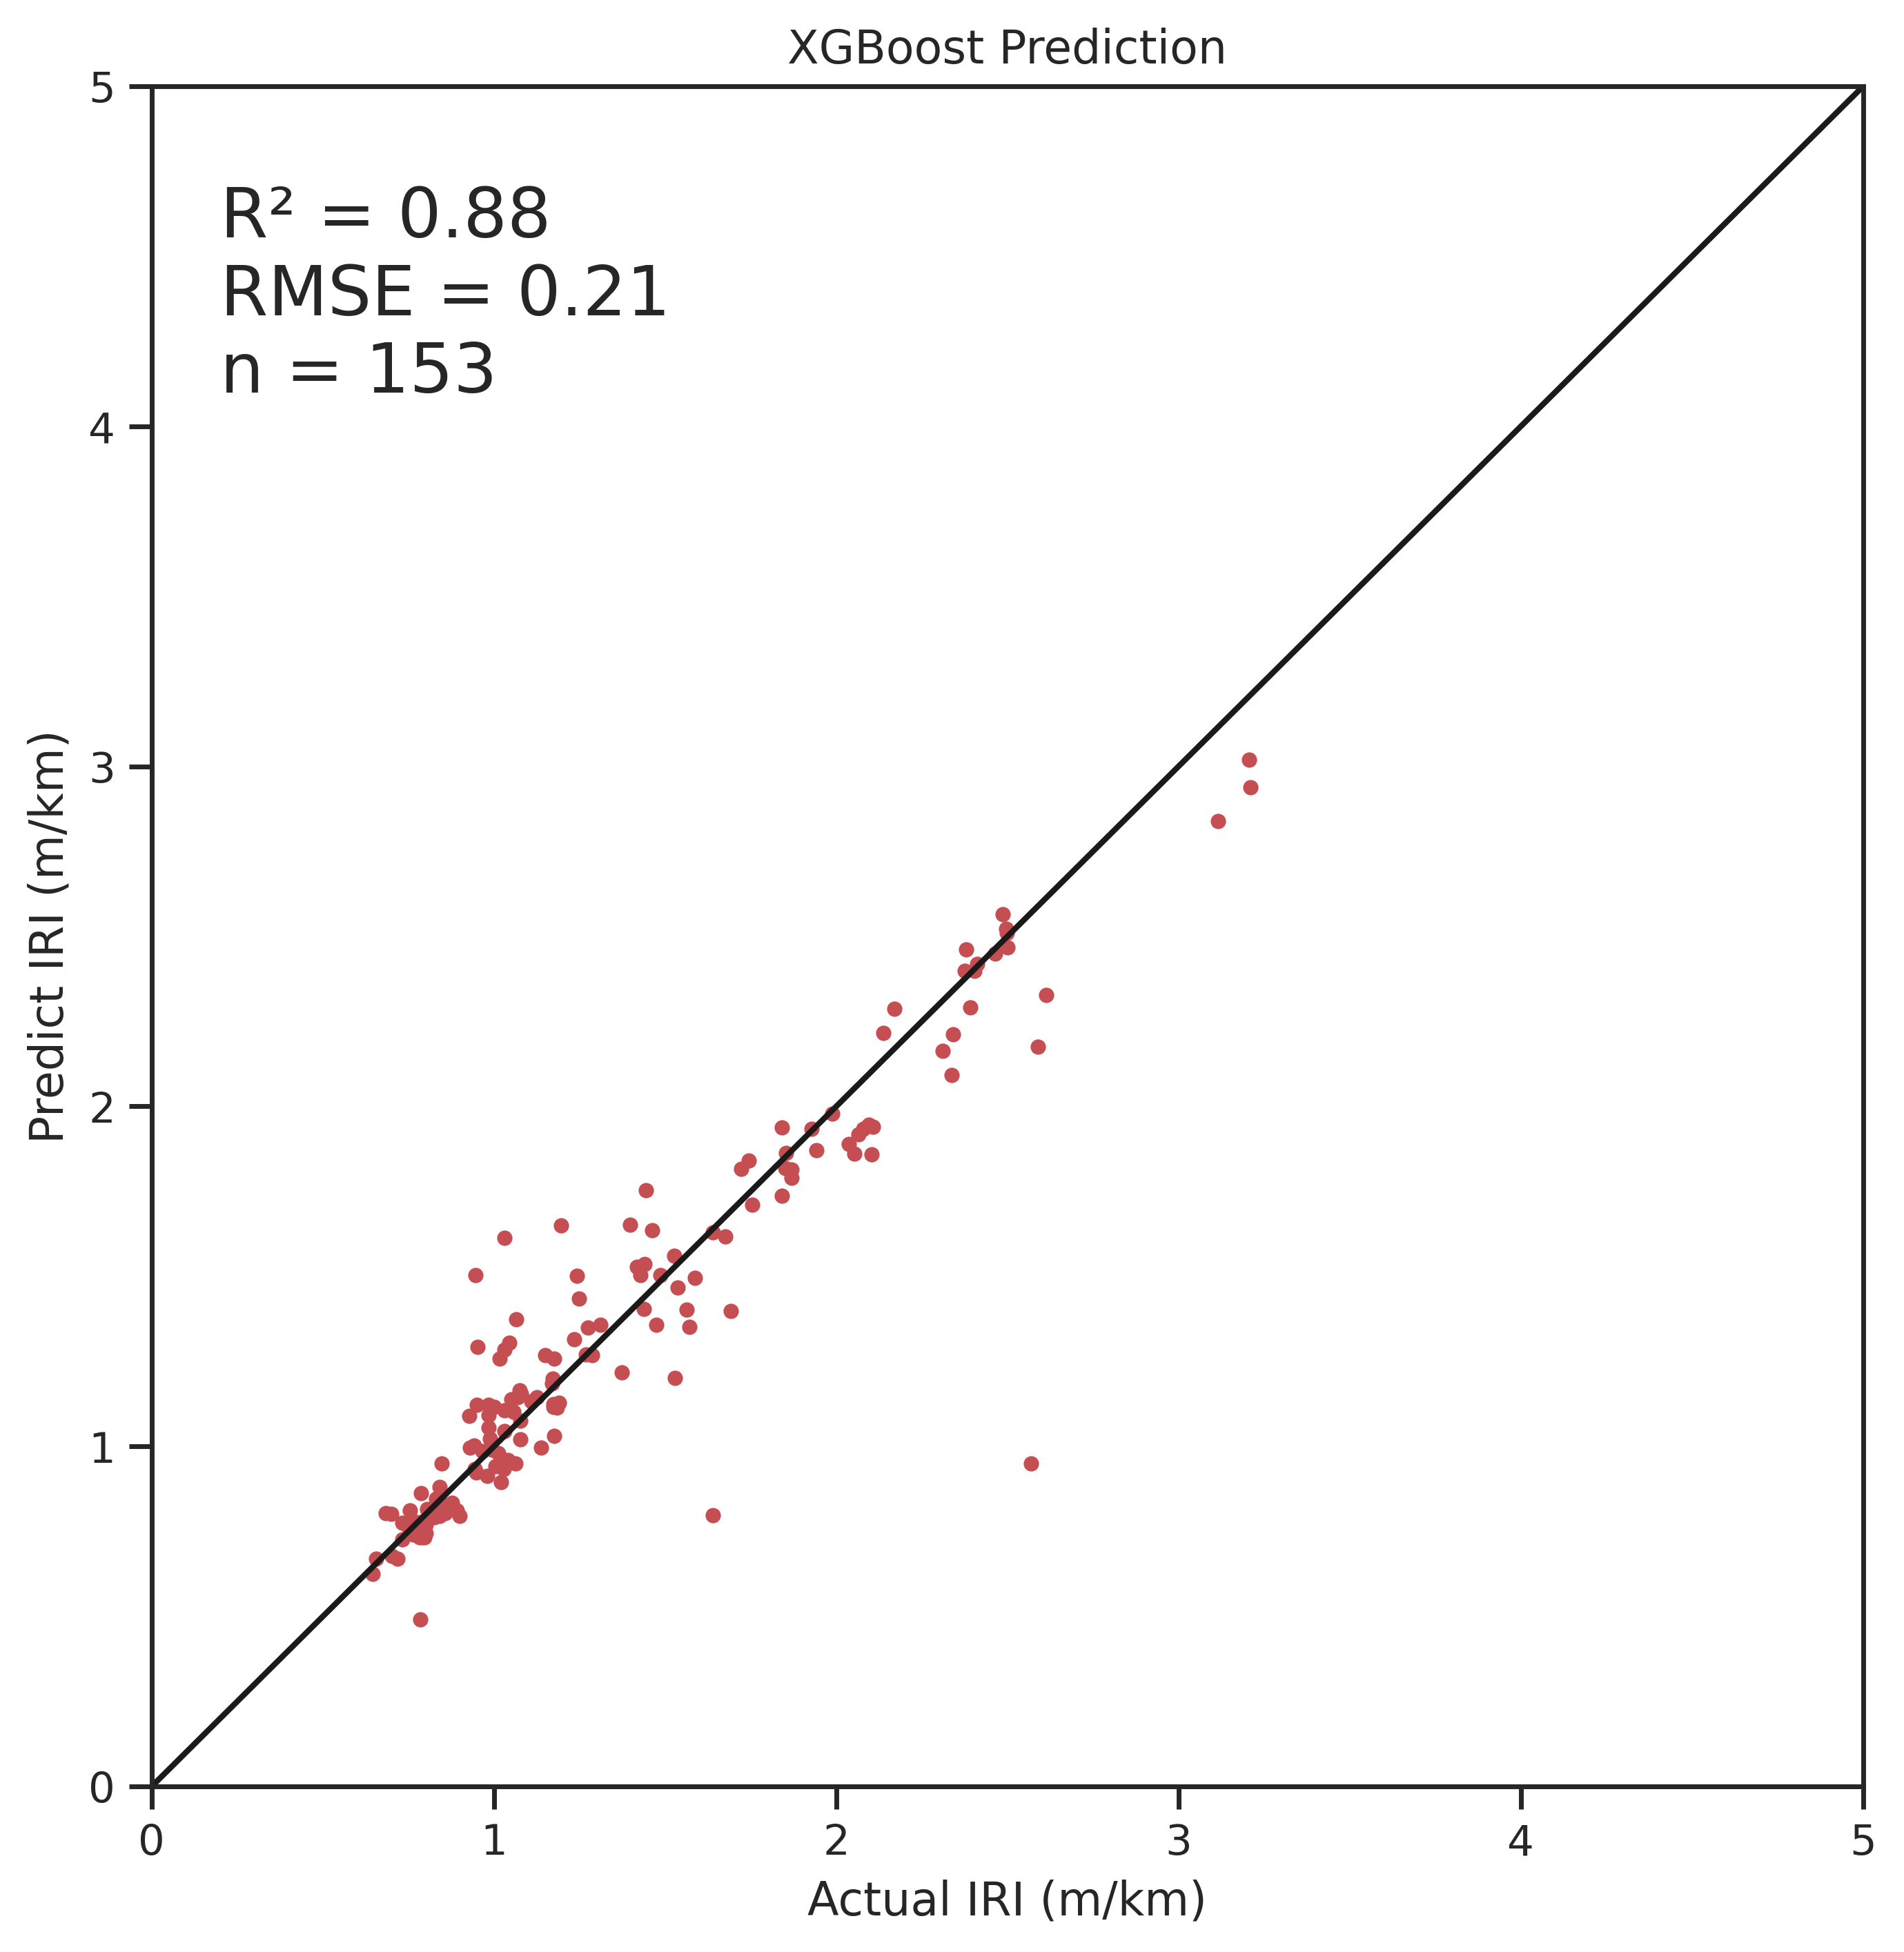

In [25]:
# plot XGBoost results
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(y_test, resultXG, 'r.', label='XGBoost Prediction')
plt.xlabel('Actual IRI (m/km)')
plt.ylabel('Predict IRI (m/km)')
plt.plot(x, x, 'k-')  # identity line
plt.axis([0, 5, 0, 5])
s = "R² = %.2f \nRMSE = %.2f\nn = %i" % (r2XG, rmseXG, n_test)
plt.text(0.2, 4.1, s, fontsize=18)
plt.title("XGBoost Prediction")
# plt.savefig('results/XGBoost.png')
plt.show()